Number of samples: 5362


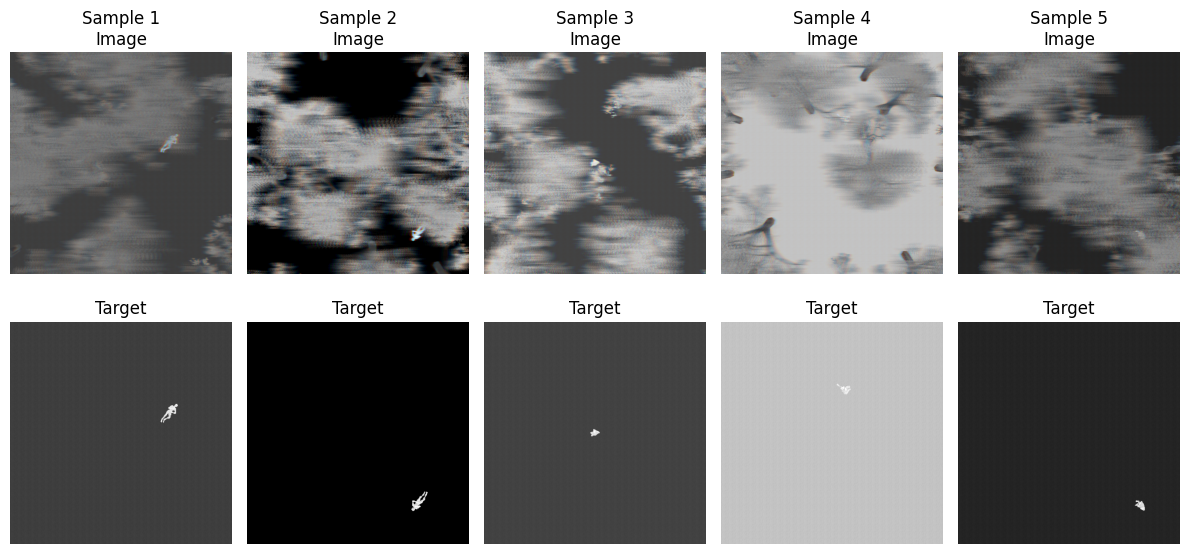

In [7]:
import os
import cv2
import numpy as np
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.image_paths = []
        self.target_paths = []
        self.param_paths = []
        
        for root, _, files in os.walk(data_dir):
            for file in files:
                if file.endswith('.png') and 'GT_pose' in file:
                    self.target_paths.append(os.path.join(root, file))
                elif file.endswith('.png') and 'merged_integral' in file:
                    self.image_paths.append(os.path.join(root, file))
                elif file.endswith('.txt') and 'Parameters' in file:
                    self.param_paths.append(os.path.join(root, file))

        self.image_paths.sort()
        self.target_paths.sort()
        self.param_paths.sort()

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        target_path = self.target_paths[index]
        param_path = self.param_paths[index]

        image = cv2.imread(image_path)
        target = cv2.imread(target_path)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

        with open(param_path, 'r') as param_file:
            parameters = param_file.readlines()

        return image, target, parameters

data_dir = '/Users/tomi/Desktop/AOS/batches_split'
custom_dataset = CustomDataset(data_dir)
print(f"Number of samples: {len(custom_dataset)}")

num_samples_to_check = 5

plt.figure(figsize=(12, 6))
for i in range(num_samples_to_check):
    image, target, parameters = custom_dataset[i]

    plt.subplot(2, num_samples_to_check, i + 1)
    plt.imshow(image)
    plt.title(f"Sample {i + 1}\nImage")
    plt.axis('off')

    plt.subplot(2, num_samples_to_check, num_samples_to_check + i + 1)
    plt.imshow(target)
    plt.title("Target")
    plt.axis('off')

plt.tight_layout()
plt.show()